# Прогноз выживания пассажиров Титаника

### Содержание:
*     Используемые библиотеки
*     Считывание и обзор датасета
*     Анализ данных
*     Визуализация данных
*     Редактирование данных
*     Выбор лучшей модели
*     Создание файла предсказания

# 1) Используемые библиотеки
Сперва импортятся все необходимые библиотеки.

In [1]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Считывание и обзор датасета
Вторым шагом является считывание данных при использовании pd.read_csv и обзор с помощью функции describe(). Исходный датасет поделен на 2 файла (для обучения и тестов соответственно). Данные делятся в соотношении ~ 70/30 (891 и 418 строк соответственно).

In [2]:
# import train and test dataset
train = pd.read_csv("learning_data/train.csv")
test = pd.read_csv("learning_data/test.csv")

# take a look at train dataset
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stanley, Mr. Edward Roland",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 3) Анализ данных
* SibSp - количество родственников 2-го порядка (муж, жена, братья, сестры);
* Parch - количество родителей, детей пассажира;
* Fare - плата за проезд;
* Embarked - порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон);

In [3]:
# get the list of all the features in the dataset
print(*train.columns.values, sep="\n")

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [4]:
# see the top 10 values of the dataset to get an idea of the variables.
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

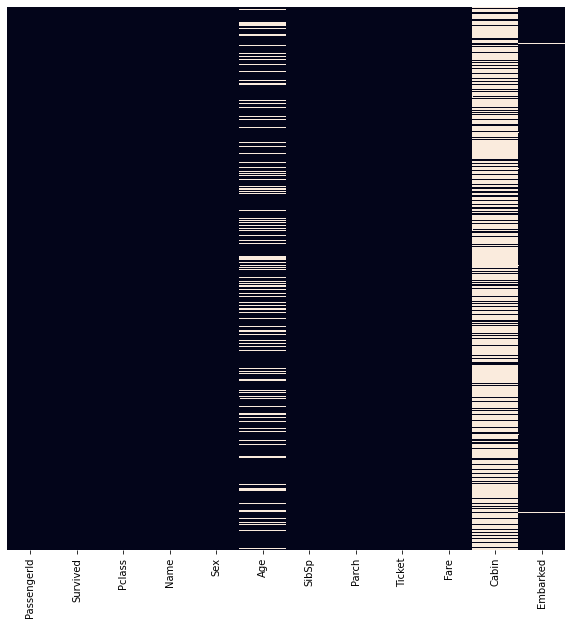

In [5]:
# Checking missing values in each variable
plt.figure(figsize=(10,10))
sn.heatmap(train.isnull(), yticklabels = False, cbar = False)

* **Числовые значения:** Age, Fare, SibSp, Parch
* **Значения категории:** Sex, Survived, Embarked, Pclass
* **Буквенно-числовые значения:** Ticket, Cabin

### Краткий обзор полученной информации:
* Датасет обучения содержит данные **891 пассажира**.
* Информация о **возрасте** отсутствует у ~ 20% пассажиров. Возраст, тем не менее, достаточно важная характеристика.
* Информации о **кабинах** пассажиров очень мало и будет очень сложно заполнить эти пропуски. Поэтому при обучении мы не будем учитывать эту характеристику.
* Информация о **порте посадки почти полная** -  отсутствует всего 0.22%. Значит столь малая неполнота не будет сильно влиять на обучение.

In [6]:
# check for any other unusable values
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Как мы видим, кроме вышеупомянутых пропущенных значений, больше NaN значений нет.

### Вывод анализа данных:
* Sex: Женщины на Титанике имели больше шансов спастись.
* SibSp/Parch: Люди, путешествующие одни, так же имели больше шансов выжить.
* Age: Чем человек моложен, тем больше шансов выжить.
* Pclass: Люди с более высоким социально-экономическим классом тоже имели больше шансов спастись.

# 4) Визуализация данных
Визуализация данных - один из лучших методов проверки правильности нашего прогноза.

### Пол (Sex feature)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


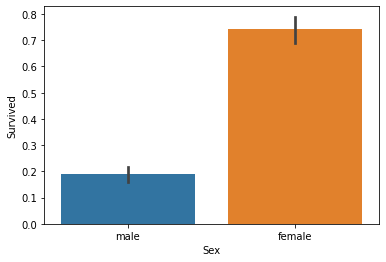

In [7]:
# Bar plot of Suvived by Sex
sn.barplot(x = "Sex",y = "Survived", data = train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Как и предсказывалось ранее, женщины имеют гораздо более высокие шансы на выживание, чем мужчины.

### Родственники второго порядка (SibSp Feature)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0


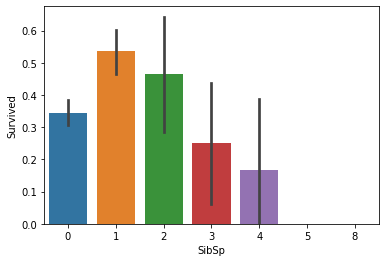

In [8]:
# bar plot of Survived by SibSp feature
sn.barplot(x="SibSp", y="Survived", data=train)

# Some of the values survived percentage percentage values
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

В целом, очевидно, что люди с большим количеством братьев и сестер или супругов на борту имели меньше шансов выжить. Однако, вопреки ожиданиям, люди, не имеющие братьев или сестер или супругов, имели меньше шансов выжить, чем те, у кого был один или два ребенка (34,5% против 53,4% и 46,4%).

### Возраст (Age Feature)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

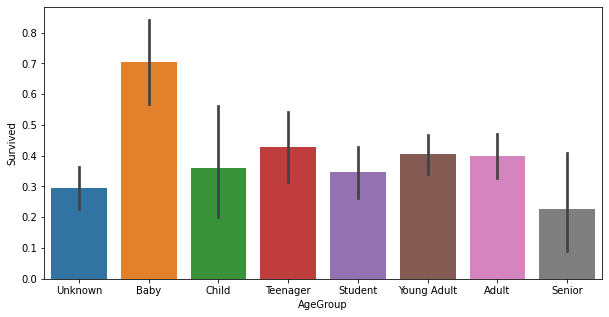

In [9]:
# sort the ages in logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

# barplot of Age vs Survived
plt.figure(figsize=(10,5))
sn.barplot(x = "AgeGroup", y = "Survived", data = train)

Младенцов выжило больше всего относительно остальных пассажирво из других возрастных групп.

### Социально-экономический класс (Pclass Feature)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


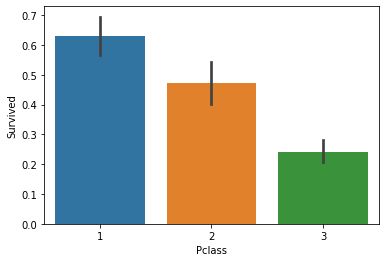

In [10]:
#draw a bar plot of Pclass vs Survived
sn.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Как и ожидалось, люди с более высоким социально-экономическим классом имели больше шансов на спасение (62.9% против 47.3% против 24.2%).

### Количество детей, родителей (Parch Feature)

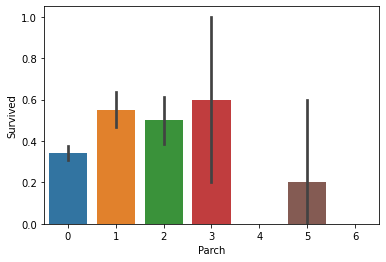

In [11]:
# bar plot of Parch vs Survived
sn.barplot(x="Parch", y="Survived", data=train)
plt.show()

Люди, у которых на борту меньше четырех родителей или детей, имеют больше шансов выжить, чем те, у кого их четверо и больше. Опять же, люди, путешествующие в одиночку, имеют меньше шансов выжить, чем те, у кого есть 1-3 родителя или детей.

# 5) Редактирование данных

### Обзор тестового датасета

In [12]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Beattie, Mr. Thomson",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


* Всего 418 пассажиров.
* Строки стоимости билета и возраста заполнены не полностью, необходимо это исправить.

## Удаление ненужных характеристик

In [13]:
# Let's start by removing Cabin Feature as not a lot more useful information can be extracted from it.
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

#we can also drop the Ticket feature since it's unlikely to yield any useful information
train.drop(['Ticket'], axis = 1, inplace = True)
test.drop(['Ticket'], axis = 1, inplace = True)

## Заполнение отсутствующих характеристик
  ### 1. **Порт посадки (Embarked Feature)**

In [14]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


Ясно, что большинство людей сели на борт в Саутгемптоне (S). Заполним недостающие значения буквой S.

In [15]:
train.fillna({'Embarked':'S'}, inplace = True)

### 2. **Возраст (Age Feature)**

Далее мы заполним недостающие значения в возрастной характеристике. Поскольку более высокий процент значений отсутствует, было бы нелогично заполнять их все одним и тем же значением (как мы сделали с Embarked). Вместо этого давайте попробуем найти способ предсказать недостающие возраста.

In [16]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [18]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Далее мы попытаемся предсказать недостающие возрастные значения по наиболее распространенному возрасту для их категории.

In [19]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for i in range(len(train["AgeGroup"])):
    if train["AgeGroup"][i] == "Unknown":
        train["AgeGroup"][i] = age_title_mapping[train["Title"][i]]
        
for i in range(len(test["AgeGroup"])):
    if test["AgeGroup"][i] == "Unknown":
        test["AgeGroup"][i] = age_title_mapping[test["Title"][i]]

In [20]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,1


In [21]:
#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Имя (Name Feature)
Теперь, когда мы извлекли заголовки, мы можем отбросить функцию имени.

In [22]:
#drop the name feature since it contains no more useful information.
train.drop(['Name'], axis = 1, inplace = True)
test.drop(['Name'], axis = 1, inplace = True)

### Пол (Sex Feature)

In [23]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


### Порт посадки (Embarked Feature)

In [24]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4.0,1
1,2,1,1,1,1,0,71.2833,2,6.0,3
2,3,1,3,1,0,0,7.9250,1,5.0,2
3,4,1,1,1,1,0,53.1000,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,5.0,1


### Стоимость билета (Fare Feature)
Разделим значения стоимости на несколько логических групп, а также заполним единственное пропущенное значение в тестовом наборе данных.

In [25]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for i in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][i]):
        pclass = test["Pclass"][i] #Pclass = 3
        test["Fare"][i] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

<ipython-input-25-bfd528b19d09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Fare"][i] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)


### Проверка отсутсвующих значений после изменений датасета

<AxesSubplot:>

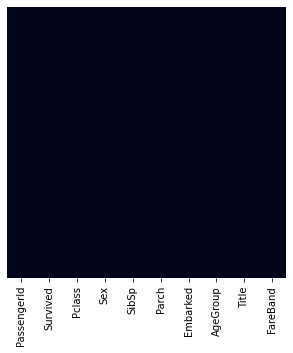

In [26]:
# train dataset
plt.figure(figsize=(5,5))
sn.heatmap(train.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:>

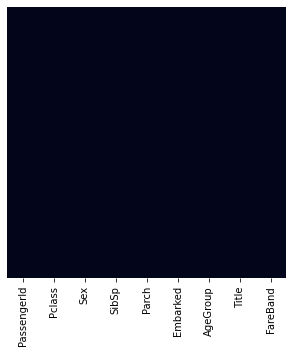

In [27]:
# Test dataset
plt.figure(figsize=(5,5))
sn.heatmap(test.isnull(), yticklabels = False, cbar = False)

Как видно из приведенных выше тепловых карт, пропущенных значений не осталось. Теперь наши данные приведены в порядок.

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4.0,1,1
1,2,1,1,1,1,0,2,6.0,3,4
2,3,1,3,1,0,0,1,5.0,2,2
3,4,1,1,1,1,0,1,5.0,3,4
4,5,0,3,0,0,0,1,5.0,1,2


In [29]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,5.0,1,1
1,893,3,1,1,0,1,6.0,3,1
2,894,2,0,0,0,3,7.0,1,2
3,895,3,0,0,0,1,5.0,1,2
4,896,3,1,1,1,1,4.0,3,2


# 6) Выбор модели

## Разделение тренировочного датасета

In [41]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis = 1)
target = train['Survived']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### Тестирование разных моделей
* KNN or k-Nearest Neighbors
* Gradient Boosting Classifier
* Adaptive Boosting (AdaBoost)

Каждую модель мы обучаем на 80% train датасета, тестируем на оставшихся 20% и проверяем точность.

In [35]:
#kNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val)*100, 2)
acc_knn

77.66

In [36]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val)*100, 2)
acc_gbc

83.25

In [37]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_val)
acc_ada = round(accuracy_score(y_pred, y_val)*100, 2)
acc_ada

82.74

Сравним точности выбранных моделей.

In [38]:
models = pd.DataFrame({
    'Model': ['KNN', 'Gradient Boosting Classifier', 'AdaBoost Classifier'],
    'Score': [acc_knn, acc_gbc, acc_ada]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Gradient Boosting Classifier,83.25
2,AdaBoost Classifier,82.74
0,KNN,77.66


# 7) Создание файла предсказания

In [39]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbc.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)